In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import models, layers

In [ ]:
bitcoinpricdata = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
bitcoinpricdata.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bitcoinpricdata

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651


In [ ]:
print('Shape of DataFrame: ',  bitcoinpricdata.shape)

Shape of DataFrame:  (4572257, 8)


In [ ]:
bitcoinpricdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [ ]:
bitcoinpricdata.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651
4572256,1600041600,10338.82,10338.82,10332.37,10332.37,1.292006,13349.565122,10332.429402


In [ ]:
bitcoinpricdata['Timestamp'] = pd.to_datetime(bitcoinpricdata['Timestamp'],unit='s')

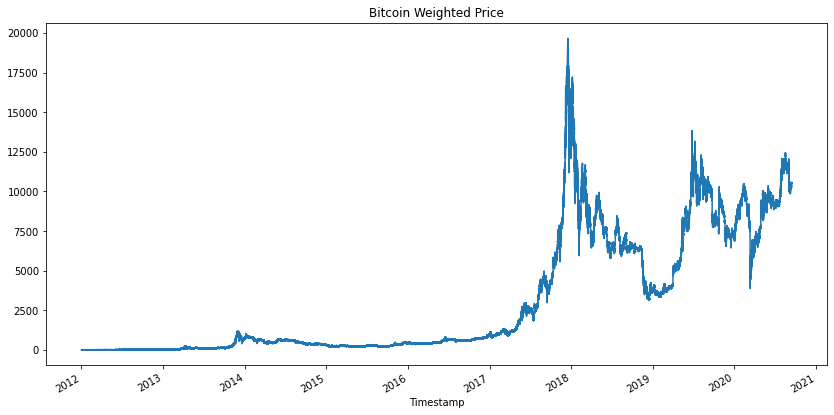

In [ ]:
bitcoinpricdata.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")


In [ ]:
#calculating missing values in the dataset

missing_values = bitcoinpricdata.isnull().sum()
missing_per = (missing_values/bitcoinpricdata.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.000000
Open,1241716,27.157616
High,1241716,27.157616
Low,1241716,27.157616
Close,1241716,27.157616
Volume_(BTC),1241716,27.157616
Volume_(Currency),1241716,27.157616
Weighted_Price,1241716,27.157616


In [ ]:
def fill_missing_values(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [ ]:
fill_missing_values(bitcoinpricdata)


            Timestamp  Open  ...  Volume_(Currency)  Weighted_Price
0 2011-12-31 07:52:00  4.39  ...           2.000000            4.39
1 2011-12-31 07:53:00  4.39  ...           2.436653            4.39
2 2011-12-31 07:54:00  4.39  ...           2.873305            4.39
3 2011-12-31 07:55:00  4.39  ...           3.309958            4.39
4 2011-12-31 07:56:00  4.39  ...           3.746611            4.39

[5 rows x 8 columns]
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
bitcoinpricdata = bitcoinpricdata.set_index('Timestamp')
bitcoinpricdata.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


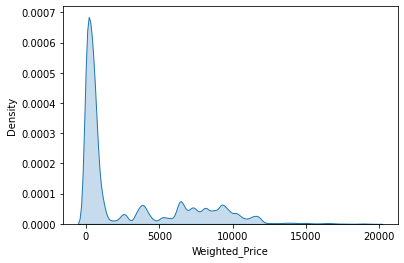

In [ ]:
import seaborn as sns

sns.kdeplot(bitcoinpricdata['Weighted_Price'], shade=True)


In [ ]:
onehr_data = bitcoinpricdata.resample('1H').mean()
onehr_data = onehr_data.reset_index()

onehr_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.803709,3.528285,4.39
1,2011-12-31 08:00:00,4.39,4.39,4.39,4.39,4.185530,18.374477,4.39
2,2011-12-31 09:00:00,4.39,4.39,4.39,4.39,10.153449,44.573640,4.39
3,2011-12-31 10:00:00,4.39,4.39,4.39,4.39,16.121368,70.772803,4.39
4,2011-12-31 11:00:00,4.39,4.39,4.39,4.39,22.089286,96.971967,4.39


In [ ]:
bitstamp_24hr = bitcoinpricdata.resample("24H").mean() #daily resampling


In [ ]:
bitstamp_24hr

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370
2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576
2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549
2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530
2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680
...,...,...,...,...,...,...,...
2020-09-10,10338.749108,10343.543889,10334.284076,10338.750021,7.110958,73535.577979,10339.348363
2020-09-11,10302.363316,10306.010990,10299.215590,10302.373052,3.648440,37580.589410,10303.176693
2020-09-12,10372.654476,10375.351788,10370.270993,10372.464646,1.748881,18139.389649,10373.142987


In [ ]:
import plotly.express as px

bitstamp_24hr.reset_index(inplace=True)
fig = px.line(bitstamp_24hr, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [ ]:
fill_missing_values(bitstamp_24hr)

   Timestamp      Open  ...  Volume_(Currency)  Weighted_Price
0 2011-12-31  4.476415  ...          79.495594        4.477370
1 2012-01-01  4.765576  ...          32.971105        4.765576
2 2012-01-02  5.006549  ...          75.932706        5.006549
3 2012-01-03  5.206530  ...          40.795994        5.206530
4 2012-01-04  5.202511  ...          72.860096        5.216680

[5 rows x 8 columns]
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
bitstamp_24hr = bitstamp_24hr.set_index("Timestamp")

In [ ]:
bitstamp_24hr.iloc[0:2923]

,Weighted_Price
Timestamp,
2011-12-31,4.477370
2012-01-01,4.765576
2012-01-02,5.006549
2012-01-03,5.206530
2012-01-04,5.216680
...,...
2019-12-27,7191.867431
2019-12-28,7298.773444
2019-12-29,7345.160715


In [ ]:
bitstamp_24hr.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'High','Low'],axis=1, inplace=True)

In [ ]:
bitstamp_24hr

,Weighted_Price
Timestamp,
2011-12-31,4.477370
2012-01-01,4.765576
2012-01-02,5.006549
2012-01-03,5.206530
2012-01-04,5.216680
...,...
2020-09-10,10339.348363
2020-09-11,10303.176693
2020-09-12,10373.142987


In [ ]:
price_series = bitstamp_24hr.reset_index().Weighted_Price.values
price_series

array([4.47737025e+00, 4.76557639e+00, 5.00654859e+00, ...,
       1.03731430e+04, 1.03957982e+04, 1.03324294e+04])

In [ ]:
time_series = bitstamp_24hr.reset_index().Timestamp.values
time_series

array(['2011-12-31T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000', ...,
       '2020-09-12T00:00:00.000000000', '2020-09-13T00:00:00.000000000',
       '2020-09-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
price_series.shape

(3181,)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [ ]:
price_series_scaled.shape

(3181, 1)

In [ ]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [ ]:
train_data

array([[6.08556702e-06],
       [2.11105388e-05],
       [3.36730766e-05],
       ...,
       [3.82695922e-01],
       [3.80231780e-01],
       [3.75082688e-01]])

In [ ]:
test_data

array([[0.37491768],
       [0.36849274],
       [0.37605608],
       [0.38148647],
       [0.38712802],
       [0.39252016],
       [0.41317751],
       [0.42912486],
       [0.41155098],
       [0.41099899],
       [0.42274381],
       [0.42265234],
       [0.42219322],
       [0.44679055],
       [0.45560518],
       [0.45199251],
       [0.46129351],
       [0.46332625],
       [0.46101572],
       [0.4504458 ],
       [0.45052091],
       [0.45153659],
       [0.43955893],
       [0.4368209 ],
       [0.43359932],
       [0.43921931],
       [0.4545379 ],
       [0.47113893],
       [0.48622488],
       [0.48830269],
       [0.48681115],
       [0.48838555],
       [0.48862304],
       [0.48619293],
       [0.47954694],
       [0.48996769],
       [0.5049084 ],
       [0.50946061],
       [0.51134823],
       [0.5253092 ],
       [0.51705421],
       [0.51888869],
       [0.53904608],
       [0.53602273],
       [0.53476191],
       [0.52860138],
       [0.51617516],
       [0.506

In [ ]:
train_data.shape, test_data.shape

((2923, 1), (258, 1))

In [ ]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [ ]:
len(train_data)

2923

In [ ]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [ ]:
X_test[0]

array([0.37491768, 0.36849274, 0.37605608, 0.38148647, 0.38712802,
       0.39252016, 0.41317751, 0.42912486, 0.41155098, 0.41099899,
       0.42274381, 0.42265234, 0.42219322, 0.44679055, 0.45560518,
       0.45199251, 0.46129351, 0.46332625, 0.46101572, 0.4504458 ,
       0.45052091, 0.45153659, 0.43955893, 0.4368209 , 0.43359932,
       0.43921931, 0.4545379 , 0.47113893, 0.48622488, 0.48830269,
       0.48681115, 0.48838555, 0.48862304, 0.48619293, 0.47954694,
       0.48996769, 0.5049084 , 0.50946061, 0.51134823, 0.5253092 ,
       0.51705421, 0.51888869, 0.53904608, 0.53602273, 0.53476191,
       0.52860138, 0.51617516, 0.50653339, 0.51309041, 0.52625357,
       0.49932132, 0.50492903, 0.50339618, 0.51430925, 0.50728602,
       0.49451491, 0.4707099 , 0.45834053, 0.45324947, 0.45260899,
       0.44589374, 0.455809  , 0.45808651, 0.45651721, 0.46999603,
       0.47408441, 0.47178328, 0.44656146, 0.41068915, 0.41413242,
       0.40901757, 0.34733263, 0.27577512, 0.28180538, 0.27606

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (157, 100), (157,))

In [ ]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(157, 100, 1)


In [ ]:
print(y_train.shape) 
print(y_test.shape)

(2822,)
(157,)


In [ ]:
#Create Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the LSTM
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 200, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/200
80/80 [==============================] - 27s 243ms/step - loss: 0.0068 - val_loss: 0.0492
Epoch 2/200
80/80 [==============================] - 17s 214ms/step - loss: 0.0194 - val_loss: 0.0279
Epoch 3/200
80/80 [==============================] - 17s 211ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 4/200
80/80 [==============================] - 17s 211ms/step - loss: 0.0204 - val_loss: 0.0114
Epoch 5/200
80/80 [==============================] - 17s 209ms/step - loss: 0.0184 - val_loss: 0.0056
Epoch 6/200
80/80 [==============================] - 17s 208ms/step - loss: 0.0091 - val_loss: 0.0029
Epoch 7/200
80/80 [==============================] - 17s 206ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 8/200
80/80 [==============================] - 17s 217ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/200
80/80 [==============================] - 17s 209ms/step - loss: 0.0039 - val_loss: 0.0108
Epoch 10/200
80/80 [==============================] - 17s 208ms/step - loss: 0.007

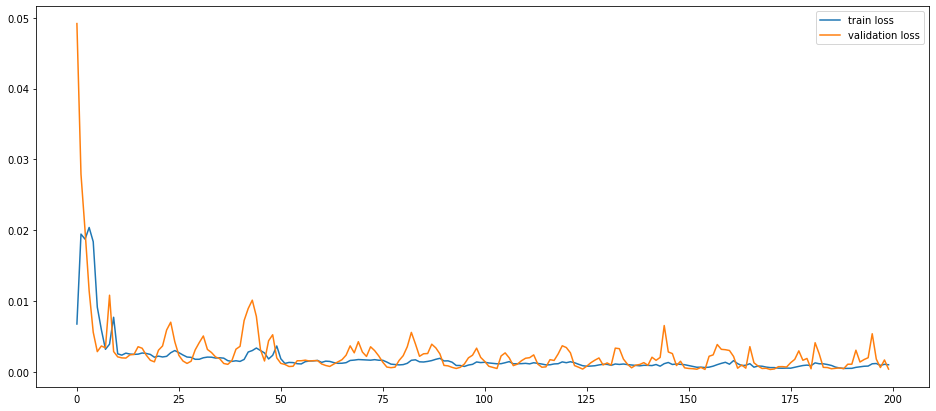

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.ylabel("Average Loss")
plt.legend()

In [ ]:
#Lets do the prediction and performance checking

X_train_predict = model.predict(X_train)
X_test_predict = model.predict(X_test)

In [ ]:
#transformation to original form

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
X_train_predict_inv = scaler.inverse_transform(X_train_predict)
X_test_predict_inv = scaler.inverse_transform(X_test_predict)

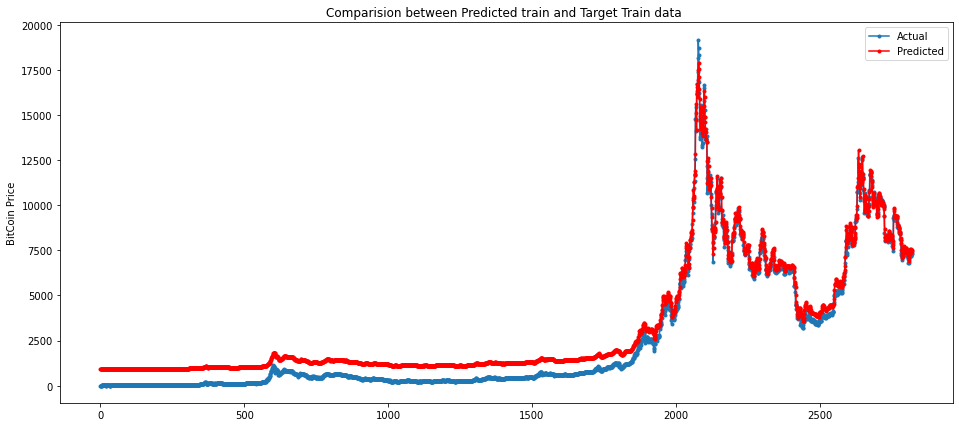

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(X_train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.ylabel("BitCoin Price")
plt.title("Comparision between Predicted train and Target Train data ")

plt.legend()

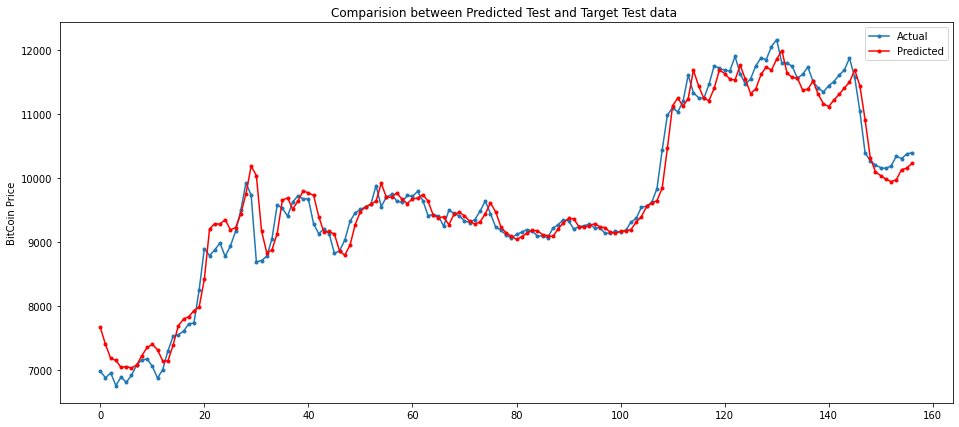

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(X_test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.ylabel("BitCoin Price")
plt.title("Comparision between Predicted Test and Target Test data ")
plt.legend()

In [ ]:
y_test_inv.flatten()

array([ 6976.30624203,  6871.94345909,  6947.87803   ,  6751.70685631,
        6884.61106872,  6801.8162349 ,  6912.4954132 ,  7071.97079441,
        7152.37871189,  7167.8373069 ,  7052.47481895,  6867.56422278,
        7000.48837044,  7294.03035521,  7521.66496367,  7546.96929677,
        7601.42011381,  7715.97716508,  7730.79847711,  8244.81773005,
        8894.27598485,  8784.23729479,  8873.30749644,  8980.49813109,
        8772.6056095 ,  8930.89784977,  9162.65638208,  9490.68228907,
        9924.47161151,  9727.26452001,  8687.5145762 ,  8706.86781146,
        8774.17437174,  9045.37065621,  9576.83866785,  9523.70146861,
        9403.52863179,  9624.59008178,  9721.80981213,  9670.29856205,
        9672.22024027,  9280.30452694,  9125.38938388,  9207.08634835,
        9123.70367205,  8819.56776795,  8859.68461494,  9027.30330797,
        9320.29837284,  9454.40027718,  9507.15768977,  9547.07079084,
        9584.67368651,  9880.13007309,  9551.65622781,  9699.75304439,
      

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, X_train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, X_test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, X_train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, X_test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.03858855395608676
Train MAE: 0.18863711947120684
Test RMSE: 0.013227889068732877
Test MAE: 0.09763174286017254


In [ ]:
from sklearn.metrics import r2_score


In [ ]:
print('R2 Score : ','{:.2%}'.format(r2_score(y_test_inv,X_test_predict_inv )))

R2 Score :  96.47%
